In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
field = pd.read_csv('pool-2019/mastersfield2019.csv')

In [3]:
app = pd.read_csv('pool-2019/sg_app_2019.csv')
arg = pd.read_csv('pool-2019/sg_arg_2019.csv')
ott = pd.read_csv('pool-2019/sg_ott_2019.csv')
putt = pd.read_csv('pool-2019/sg_putt_2019.csv')
top10 = pd.read_csv('pool-2019/top10_finishes_2019.csv')

In [4]:
temp1 = app.merge(arg, on='name')
temp2 = ott.merge(putt, on='name')
temp3 = top10.merge(temp1, on='name')
master = temp3.merge(temp2, on='name')

In [5]:
master.fillna(value=0, inplace=True)

In [6]:
master_small = master[master.columns.drop(list(master.filter(regex='rank')))]

In [7]:
master_small = master_small[master_small.columns.drop(list(master_small.filter(regex='rounds')))]

In [8]:
player_IDs = master_small['name']

In [9]:
master_small.drop('name', axis=1, inplace=True)

In [10]:
from sklearn.decomposition import PCA

In [11]:
pga_pca = PCA(n_components=2).fit(master_small)
pga_pca_results = pga_pca.transform(master_small)

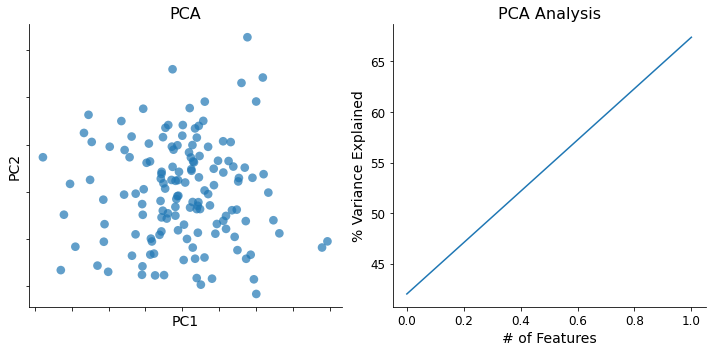

In [12]:
# plot PCA results for first two PCs, colored by desired label (live birth)
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.scatterplot(x=pga_pca_results[:,0], y=pga_pca_results[:,1], s=75, alpha=0.7, legend=None, edgecolor='none')
plt.tick_params(labelbottom=False, labelleft=False)
plt.ylabel('PC2', fontsize=14)
plt.xlabel('PC1', fontsize=14)
plt.title('PCA', fontsize=16)

plt.subplot(122)
plt.plot(np.cumsum(np.round(pga_pca.explained_variance_ratio_, decimals=3)*100))
plt.tick_params(labelsize=12)
plt.ylabel('% Variance Explained', fontsize=14)
plt.xlabel('# of Features', fontsize=14)
plt.title('PCA Analysis', fontsize=16)

sns.despine()
plt.tight_layout()
plt.show()

In [13]:
# we can extract the contribution of each feature to each PC
PCfeatures = pd.DataFrame(pga_pca.components_, columns=master_small.columns)
# look at top 10 features that contribute to PC1, in descending order
PCfeatures.iloc[0,:].rank().sort_values()

total_sg_app        1.0
total_sg_ott        2.0
top_10              3.0
average_sg_app      4.0
total_sg_arg        5.0
average_sg_ott      6.0
second              7.0
third               8.0
first               9.0
average_sg_arg     10.0
average_sg_putt    11.0
events_top10       12.0
total_sg_putt      13.0
Name: 0, dtype: float64

In [16]:
field.head(10)

,name,group
0,Dustin Johnson,1
1,Justin Rose,1
2,Rory McIlroy,1
3,Brooks Koepka,1
4,Justin Thomas,1
5,Bryson DeChambeau,1
6,Francesco Molinari,1
7,Rickie Fowler,1
8,Jon Rahm,1
9,Xander Schauffele,1
